In [1]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 10

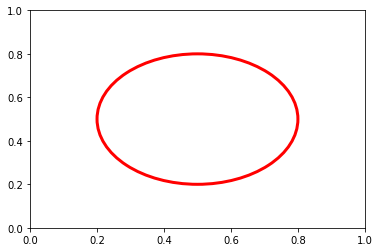

In [2]:
fig, ax = plt.subplots()
c = plt.Circle((0.5,0.5), 0.3,
               facecolor="none", edgecolor="red", linewidth=3)
ax.add_artist(c)

In [3]:
type(c).__mro__

(matplotlib.patches.Circle,
 matplotlib.patches.Ellipse,
 matplotlib.patches.Patch,
 matplotlib.artist.Artist,
 object)

# Control the Aspect Ratio

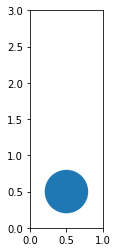

In [4]:
fig, ax = plt.subplots()
c = plt.Circle((0.5,0.5), 0.3)
ax.add_patch(c)
ax.set_ylim(0,3)
ax.set_aspect(1)

In [5]:
%config InlineBackend.print_figure_kwargs

{'bbox_inches': 'tight'}

In [6]:
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

# Coordinate Reference Systems

432.0 288.0
294.7796875 76.88000000000001


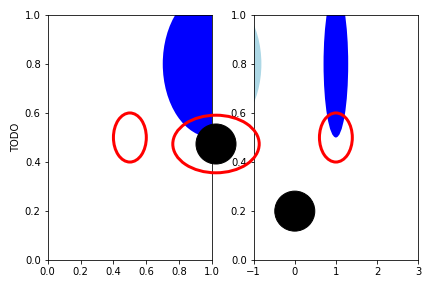

In [7]:
# transformers: ax.transData, ax.transAxes, fig.transFigure, None

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,4))
ax1.set_ylabel("TODO")
ax2.set_xlim(-1, 3)

# 1. transData

c = plt.Circle((1, 0.8), 0.3,
               facecolor="blue",
               transform=ax1.transData)
ax1.add_artist(c)

c = plt.Circle((1, 0.8), 0.3,
               facecolor="lightblue",
               transform=ax1.transData)
ax2.add_artist(c)

c = plt.Circle((1, 0.8), 0.3, # default: transform=ax2.transData
               facecolor="blue")
ax2.add_artist(c)

# 2. transAxes+transFigure (0-to-1 scale)
c = plt.Circle((0.5, 0.5), 0.1, edgecolor="red", facecolor="none", linewidth=3,
               transform=ax1.transAxes)
ax1.add_artist(c)

c = plt.Circle((0.5, 0.5), 0.1, edgecolor="red", facecolor="none", linewidth=3,
               transform=ax2.transAxes)
ax2.add_artist(c)

c = plt.Circle((0.5, 0.5), 0.1, edgecolor="red", facecolor="none", linewidth=3,
               transform=fig.transFigure)
fig.add_artist(c)

# 3. "display" (no transformer)

width = 6 * fig.dpi # "dots" (or pixels) per inch
height = 4 * fig.dpi
print(width, height)

c = plt.Circle((width/2, height/2), 20, color="k",
               transform=None)
fig.add_artist(c)

plt.tight_layout()
fig.savefig("temp.png")

# mix and match: transData for the position, radius in raw pixels

x, y = ax2.transData.transform((0,0.2))
print(x, y)
c = plt.Circle((x, y), 20, color="k",
               transform=None)
ax2.add_artist(c)

# Example: scatter with arrows

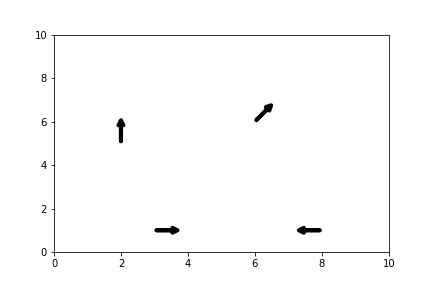

In [8]:
import pandas as pd
import math
from matplotlib.patches import FancyArrowPatch

df = pd.DataFrame([
    {"x":2, "y":5, "a": 90},
    {"x":3, "y":1, "a": 0},
    {"x":6, "y":6, "a": 45},
    {"x":8, "y":1, "a": 180}
])

fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

for row in df.itertuples():
    raw_x, raw_y = ax.transData.transform((row.x, row.y))
    
    # version 1: circles
    #c = plt.Circle((raw_x, raw_y), 10, transform=None)
    #ax.add_artist(c)
    
    # version 2: arrows
    a = math.radians(row.a)
    y_diff = math.sin(a) * 25
    x_diff = math.cos(a) * 25
    arrow = FancyArrowPatch((raw_x, raw_y), (raw_x+x_diff, raw_y+y_diff),
                            transform=None,
                            linewidth=4, arrowstyle="simple,head_width=5,head_length=5")
    ax.add_artist(arrow)